In [1]:
import numpy as np
import math

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import math
import pandas as pd
from functools import partial
%matplotlib inline
py.init_notebook_mode(connected=True)

In [11]:
import numpy as np
import scipy.stats as ss
import time 


class BlackScholes(object):
    def __init__(self, S, K, r, sig, div, T):
        self.__K = K
        self.__T = T
        self.__S = S
        self.__sig = sig
        self.__r = r
        self.__div = div
        
    #Black and Scholes
    def d1(self, S=0, K=0, r=0, sig=0, div=0, T=0):
        if S==0:
            S = self.__S
        if K==0:
            K = self.__K
        if r==0:
            r = self.__r
        if sig==0:
            sig = self.__sig
        if div==0:
            div = self.__div
        if T==0:
            T = self.__T
        return (np.log(S/K) + (r -div + sig**2 / 2) * T)/(sig * np.sqrt(T))
    
    def d2(self, S=0, K=0, r=0, sig=0, div=0, T=0):
        if S==0:
            S = self.__S
        if K==0:
            K = self.__K
        if r==0:
            r = self.__r
        if sig==0:
            sig = self.__sig
        if div==0:
            div = self.__div
        if T==0:
            T = self.__T
        return (np.log(S/K) + (r -div - sig**2 / 2) * T)/(sig * np.sqrt(T))

    def price(self, types = "call"):
        if types=="call":
            return self.__S * np.exp(-self.__div * self.__T)* ss.norm.cdf(self.d1()) - self.__K * np.exp(-self.__r * self.__T) * ss.norm.cdf(self.d2())
        else:
            return self.__K * np.exp(-self.__r * self.__T) * ss.norm.cdf(-self.d2()) - self.__S * np.exp(-self.__div * self.__T) * ss.norm.cdf(-self.d1())

    def delta(self, S, K, r, sig, div, T, t):
        return ss.norm.cdf(self.d1(S, K, r, sig, div, T-t))
    
    def gamma(self, S, K, r, sig, div, T, t):
        return ss.norm.pdf(self.d1(S, K, r, sig, div, T))/S*sig*np.sqrt(T-t)

    def rho(self, S, K, r, sig, div, T, t):
        return K*(T-t)*np.exp(-r*(T-t))*ss.norm.cdf(self.d2(S, K, r, sig, div, T))
    
    def theta(self, S, K, r, sig, div, T, t):
        return -S*ss.norm.pdf(self.d1(S, K, r, sig, div, T))*sig/(2*np.sqrt(T-t))-r*K*np.exp(-r*(T-t))*ss.norm.cdf(self.d2(S, K, r, sig, div, T))
                              
    def vega(self, S, K, r, sig, div, T, t):
        return S*ss.norm.pdf(self.d1(S, K, r, sig, div, T))*np.sqrt(T-t)


In [12]:
bs = BlackScholes(S=100, K=100, r=0.06, sig=0.2,div=0.03, T=1)
bs.d2()

0.049999999999999975

In [13]:
S=100 
K=100 
r=0.06 
sig=0.2
div=0.03 
T=1

In [14]:
bs.gamma(S,K,r,sig,div,T,350/365)

0.00015677165973541424

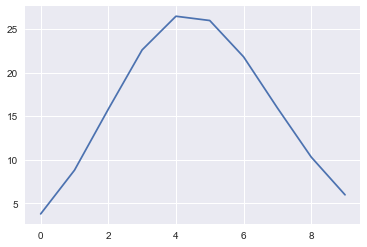

In [26]:
plt.plot([bs.vega(i,K,r,0.1,div,T,190/365) for i in np.arange(80,120,4)])

In [ ]:
class MontoCarlo(object):
    def __init__(self, K, T, S, sig, r, div, N, M, lines=200):
        self.__K = K
        self.__T = T
        self.__S = S
        self.__sig = sig
        self.__r = r
        self.__div = div
        self.__N = N
        self.__M = M
        self.__lines = lines
        
    @property
    def K(self):
        return self.__K
    @K.setter
    def K(self, value):
        self.__K = value
        
    @property
    def T(self):
        return self.__T
    @T.setter
    def T(self, value):
        self.__T = value
        
    @property
    def S(self):
        return self.__S
    @S.setter
    def S(self, value):
        self.__S = value
        
    @property
    def N(self):
        return self.__N
    @N.setter
    def N(self, value):
        self.__N = value
      
    @property
    def M(self):
        return self.__M
    @M.setter
    def M(self, value):
        self.__M = value
        
    @property
    def r(self):
        return self.__r
    @r.setter
    def r(self, value):
        self.__r = value
      
    @property
    def div(self):
        return self.__div
    @div.setter
    def div(self, value):
        self.__div = value
        
    @property
    def sig(self):
        return self.__sig
    @sig.setter
    def sig(self, value):
        self.__sig = value
    
    def __call(self, St):
        return max(0, St - self.__K)
    
    def __put(self, St):
        return max(0, self.__K - St)
    
    def __digital(self,St):
        return 
    
    def normal(self, type_of_option='call', anti=False, M=0):
        if M==0:
            M=self.__M
        
            
        fun = {'call':self.__call, 'put':self.__put}[type_of_option]
        dt = self.__T/self.__N
        nudt = (self.__r - self.__div-0.5*self.__sig**2)*dt
        sigsdt = self.__sig*np.sqrt(dt)
        lnS = np.log(self.__S)
        
        
        
        sum_ct = 0
        sum_ct2 = 0
        
        
        for i in range(M):
            
            lnSt = lnS
            if anti == True:
                lnSt2 = lnS
            for j in range(self.__N):
                randn = np.random.normal(0, 1)
                lnSt += nudt + sigsdt*randn
                if anti == True:
                    lnSt2 += nudt + sigsdt*(-randn)
            
            St = np.exp(lnSt)
            
            if anti == True:
                St2 = np.exp(lnSt2)
            
            if anti == True:
                Ct = 0.5*(fun(St)+fun(St2))
            else:
                Ct = fun(St)
            sum_ct += Ct
            sum_ct2 += Ct*Ct
            
            
        
        option_value = np.exp(-self.__r*self.__T)*sum_ct/M
        SD = np.sqrt((sum_ct2 - sum_ct*sum_ct/M)*np.exp(-2*self.__r*self.__T)/(M - 1))
        SE = SD/np.sqrt(M)
        
        return{type_of_option:option_value, 'SD':SD, 'SE':SE, 'M':M}
    
    def delta_hedge_control(self, M=0):
        if M==0:
            M=self.__M        
    
    def model_test(self, fun, M = [500, 1000, 5000, 10000, 50000, 100000]):
        dict_list = []
        for m in M:
            dict_list.append(fun(M=m))
            print(m)
        return pd.DataFrame.from_records(dict_list)
    
    def convergence(self, dfs):
        data = []
        if type(dfs)!= list:
            trace = go.Scatter(x=np.log(dfs['M']),
                              y=np.log(dfs['SE']),
                              mode='lines')
            data.append(trace)
        else:            
            for df in dfs:
                trace = go.Scatter(x=np.log(df['M']),
                              y=np.log(df['SE']),
                              mode='lines')
                data.append(trace)
        layout = go.Layout(
            xaxis={'title': 'log(M)'},
            yaxis={'title': 'log(Standard Error)'})
        fig = go.Figure(data = data, layout = layout)
        py.iplot(fig)


In [ ]:
mc = MontoCarlo(S=100, K=100, T=1, M=1000, N=365, sig=0.2, div=0.03, r=0.06)

In [ ]:
mcn1 = partial(mc.normal, anti=True)

In [ ]:
df_r2 = mc.model_test(fun=mcn1)

In [110]:
mc.convergence([df_r1,df_r2])